In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utils import *

In [2]:
'''
params options

na_data will fill missing data with 'unknown', delete missing data or do nothing
input options are...
    * 'fill'
    * 'drop'
    * False

drop_outlier_days removes pets who have a lenght of stay exceeding the value YOU enter
input options are...
    * False
    * or any integer

sample_dict controls stratified sampling
    * stratify_col: a column name used for stratified sampling... spelling and caps must be exact
    * train_size: a fraction of data you want for the training data
    * validate_size: a fraction of data you want for the validate data
    * test_size: a fraction of data you want for the test data
'''

params = {
        'na_data': 'fill',
        'drop_outlier_days': 300,
        'sample_dict':
            {
            'stratify_col':'Type',
            'train_size':0.6, 'validate_size':0.2, 'test_size':0.2
            }
        }
train_df, validate_df, test_df = load_df(params)
df = pd.concat([train_df, validate_df, test_df], ignore_index=True) # do this if you want to look at all the data still

Date Of Birth is NOT A STRING
Intake Date is NOT A STRING
Outcome Date is NOT A STRING
Days in Shelter is NOT A STRING
Count is NOT A STRING
replace null values in Name with 'Unknown'
replace null values in Size with 'Unknown'
replace null values in Outcome_Type with 'Unknown'
replace null values in Outcome_Subtype with 'Unknown'
replace null values in Outcome_Condition with 'Unknown'
replace null values in Outcome_Jurisdiction with 'Unknown'
replace null values in Outcome_Zip_Code with 'Unknown'
replace null values in Location with 'Unknown'


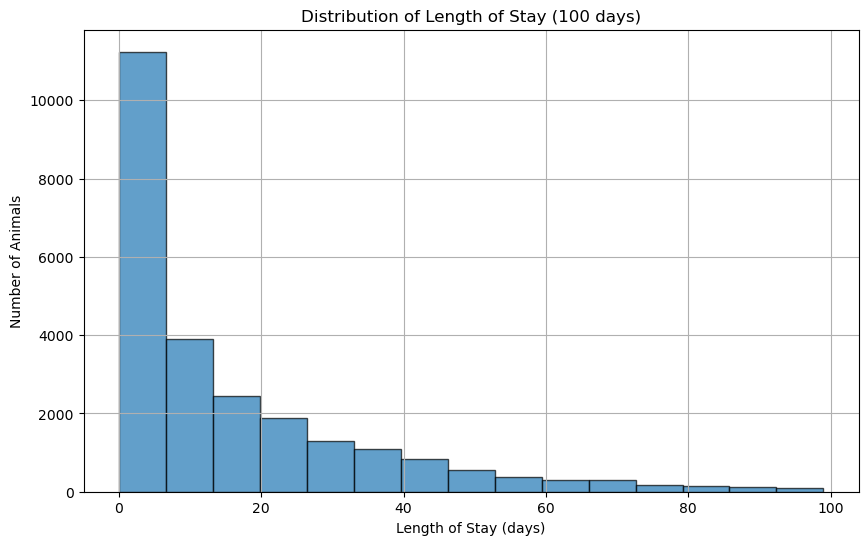

In [3]:
# Plot the length of stay
plt.figure(figsize=(10, 6))
plt.hist(df[df.Days_in_Shelter<100]['Days_in_Shelter'], bins=15, edgecolor='k', alpha=0.7)
plt.title('Distribution of Length of Stay (100 days)')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Number of Animals')
plt.grid(True)
plt.show()

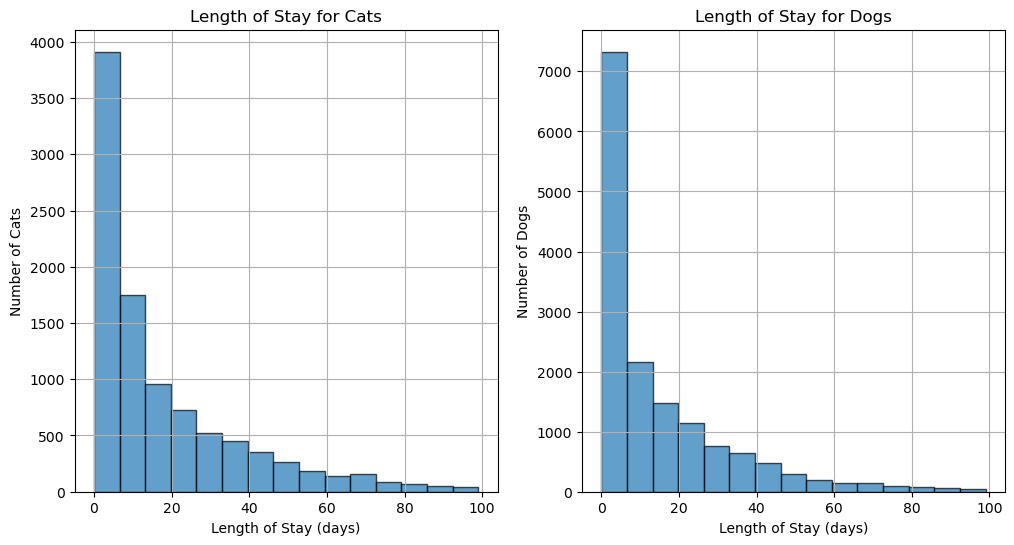

In [4]:
# Log transformation of the length of stay
df['Log Length of Stay'] = np.log1p(df['Days_in_Shelter'])  # log1p is used to handle log(0)

# Separate df for cats and dogs
cats = df[df['Type'] == 'CAT']
dogs = df[df['Type'] == 'DOG']

# Plot the log-transformed length of stay for cats
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(cats[cats.Days_in_Shelter<100]['Days_in_Shelter'].dropna(), bins=15, edgecolor='k', alpha=0.7)
plt.title('Length of Stay for Cats')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Number of Cats')
plt.grid(True)

# Plot the log-transformed length of stay for dogs
plt.subplot(1, 2, 2)
plt.hist(dogs[dogs.Days_in_Shelter<100]['Days_in_Shelter'].dropna(), bins=15, edgecolor='k', alpha=0.7)
plt.title('Length of Stay for Dogs')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Number of Dogs')
plt.grid(True)

In [5]:
# Create a date range from the minimum intake date to the maximum outcome date
SR_df = df[df.Intake_Jurisdiction=='SANTA ROSA']
date_range = pd.date_range(start=SR_df['Intake_Date'].min(), end=SR_df['Outcome_Date'].max())

# Initialize a time series dfFrame
SR_occupancy_ts = pd.DataFrame(0, index=date_range, columns=['Occupancy'])

# Calculate daily occupancy
for _, row in SR_df.iterrows():
    intake_date = row['Intake_Date']
    outcome_date = row['Outcome_Date']
    SR_occupancy_ts.loc[intake_date:outcome_date, 'Occupancy'] += 1

# Create a date range from the minimum intake date to the maximum outcome date
C_df = df[df.Intake_Jurisdiction=='COUNTY']
date_range = pd.date_range(start=C_df['Intake_Date'].min(), end=C_df['Outcome_Date'].max())

# Initialize a time series dfFrame
C_occupancy_ts = pd.DataFrame(0, index=date_range, columns=['Occupancy'])

# Calculate daily occupancy
for _, row in C_df.iterrows():
    intake_date = row['Intake_Date']
    outcome_date = row['Outcome_Date']
    C_occupancy_ts.loc[intake_date:outcome_date, 'Occupancy'] += 1


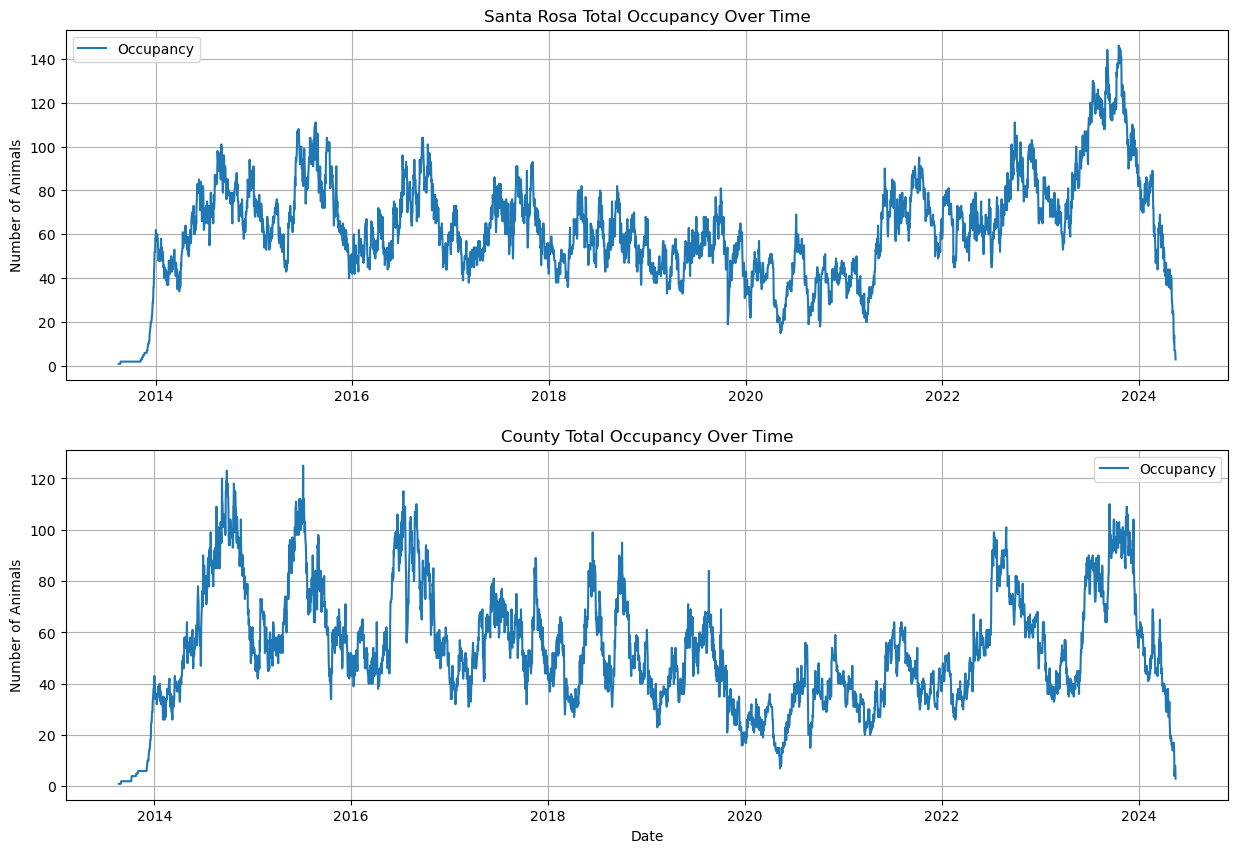

In [6]:
# Plot the time series

plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(SR_occupancy_ts.index, SR_occupancy_ts['Occupancy'], label='Occupancy')
plt.title('Santa Rosa Total Occupancy Over Time')
# plt.xlabel('Date')
plt.ylabel('Number of Animals')
plt.legend()
plt.grid(True)
# Plot the time series
plt.subplot(2, 1, 2)
plt.plot(C_occupancy_ts.index, C_occupancy_ts['Occupancy'], label='Occupancy')
plt.title('County Total Occupancy Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Animals')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
df.Intake_Jurisdiction.value_counts()

Intake_Jurisdiction
SANTA ROSA       12376
COUNTY           11022
*WINDSOR          1386
OUT OF COUNTY      158
*ROHNERT PARK       69
*HEALDSBURG         52
*SONOMA             51
*PETALUMA           49
*CLOVERDALE         24
*SEBASTOPOL         22
*TRIBAL RESV        13
*COTATI              7
UNKNOWN              6
Name: count, dtype: int64